Exploratory Data Analysis 

• Summarize data: record counts, missing values, and schema

• Visualize the raw dataset using charts and tables (line/bar charts, q-q plots, heatmaps, violin, etc.)

• Structured Data: Perform univariate and bivariate analysis of the features

• Image Data: Histograms, samples, outliers


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("full_data_flightdelay.csv")
df

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,1,7,0,0800-0859,2,1,25,143,Southwest Airlines Co.,13056,...,8,McCarran International,36.080,-115.152,NONE,0.00,0.0,0.0,65.0,2.91
1,1,7,0,0700-0759,7,1,29,191,Delta Air Lines Inc.,13056,...,3,McCarran International,36.080,-115.152,NONE,0.00,0.0,0.0,65.0,2.91
2,1,7,0,0600-0659,7,1,27,199,Delta Air Lines Inc.,13056,...,18,McCarran International,36.080,-115.152,NONE,0.00,0.0,0.0,65.0,2.91
3,1,7,0,0600-0659,9,1,27,180,Delta Air Lines Inc.,13056,...,2,McCarran International,36.080,-115.152,NONE,0.00,0.0,0.0,65.0,2.91
4,1,7,0,0001-0559,7,1,10,182,Spirit Air Lines,13056,...,1,McCarran International,36.080,-115.152,NONE,0.00,0.0,0.0,65.0,2.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6489057,12,7,0,2300-2359,1,11,3,123,Hawaiian Airlines Inc.,1318,...,18,Lihue Airport,21.979,-159.346,Honolulu International,0.06,0.0,0.0,84.0,15.21
6489058,12,7,0,1800-1859,1,11,2,123,Hawaiian Airlines Inc.,1318,...,16,Lihue Airport,21.979,-159.346,Honolulu International,0.06,0.0,0.0,84.0,15.21
6489059,12,7,0,2000-2059,1,11,2,123,Hawaiian Airlines Inc.,1318,...,18,Lihue Airport,21.979,-159.346,Honolulu International,0.06,0.0,0.0,84.0,15.21
6489060,12,7,0,2100-2159,1,12,3,123,Hawaiian Airlines Inc.,1318,...,18,Lihue Airport,21.979,-159.346,Honolulu International,0.06,0.0,0.0,84.0,15.21


In [6]:
# Take a random sample (adjust sample size as needed)
sample_size = 50000  # Adjust the number of rows you want in the sample
df_sample = df.sample(n=sample_size, random_state=42)

# Save to a new CSV file
sample_file_path = "sample_data_flight.csv"
df_sample.to_csv(sample_file_path, index=False)


In [61]:
df.shape

(6489062, 26)

In [62]:
df.isnull().sum()

MONTH                            0
DAY_OF_WEEK                      0
DEP_DEL15                        0
DEP_TIME_BLK                     0
DISTANCE_GROUP                   0
SEGMENT_NUMBER                   0
CONCURRENT_FLIGHTS               0
NUMBER_OF_SEATS                  0
CARRIER_NAME                     0
AIRPORT_FLIGHTS_MONTH            0
AIRLINE_FLIGHTS_MONTH            0
AIRLINE_AIRPORT_FLIGHTS_MONTH    0
AVG_MONTHLY_PASS_AIRPORT         0
AVG_MONTHLY_PASS_AIRLINE         0
FLT_ATTENDANTS_PER_PASS          0
GROUND_SERV_PER_PASS             0
PLANE_AGE                        0
DEPARTING_AIRPORT                0
LATITUDE                         0
LONGITUDE                        0
PREVIOUS_AIRPORT                 0
PRCP                             0
SNOW                             0
SNWD                             0
TMAX                             0
AWND                             0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6489062 entries, 0 to 6489061
Data columns (total 26 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   MONTH                          int64  
 1   DAY_OF_WEEK                    int64  
 2   DEP_DEL15                      int64  
 3   DEP_TIME_BLK                   object 
 4   DISTANCE_GROUP                 int64  
 5   SEGMENT_NUMBER                 int64  
 6   CONCURRENT_FLIGHTS             int64  
 7   NUMBER_OF_SEATS                int64  
 8   CARRIER_NAME                   object 
 9   AIRPORT_FLIGHTS_MONTH          int64  
 10  AIRLINE_FLIGHTS_MONTH          int64  
 11  AIRLINE_AIRPORT_FLIGHTS_MONTH  int64  
 12  AVG_MONTHLY_PASS_AIRPORT       int64  
 13  AVG_MONTHLY_PASS_AIRLINE       int64  
 14  FLT_ATTENDANTS_PER_PASS        float64
 15  GROUND_SERV_PER_PASS           float64
 16  PLANE_AGE                      int64  
 17  DEPARTING_AIRPORT              object 
 18  LA

In [4]:
categorical_cols = df.select_dtypes(include=['object', 'category', "bool"]).columns
numerical_cols = df.select_dtypes(include=['number']).columns

num_categorical = len(categorical_cols)
num_numerical = len(numerical_cols)

In [5]:
num_categorical

4

In [66]:
categorical_cols

Index(['DEP_TIME_BLK', 'CARRIER_NAME', 'DEPARTING_AIRPORT',
       'PREVIOUS_AIRPORT'],
      dtype='object')

In [67]:
num_numerical

22

In [68]:
numerical_cols

Index(['MONTH', 'DAY_OF_WEEK', 'DEP_DEL15', 'DISTANCE_GROUP', 'SEGMENT_NUMBER',
       'CONCURRENT_FLIGHTS', 'NUMBER_OF_SEATS', 'AIRPORT_FLIGHTS_MONTH',
       'AIRLINE_FLIGHTS_MONTH', 'AIRLINE_AIRPORT_FLIGHTS_MONTH',
       'AVG_MONTHLY_PASS_AIRPORT', 'AVG_MONTHLY_PASS_AIRLINE',
       'FLT_ATTENDANTS_PER_PASS', 'GROUND_SERV_PER_PASS', 'PLANE_AGE',
       'LATITUDE', 'LONGITUDE', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'AWND'],
      dtype='object')

  DEP_TIME_BLK                 PART_OF_DAY
0    0800-0859                     Morning
1    0700-0759                     Morning
2    0600-0659                     Morning
3    0600-0659                     Morning
4    0001-0559  Early Morning & Late Night


/var/folders/wt/tg6zmlg51zgby6_gsdtq6tpw0000gn/T/ipykernel_85680/1127222734.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['PART_OF_DAY'], palette="viridis")


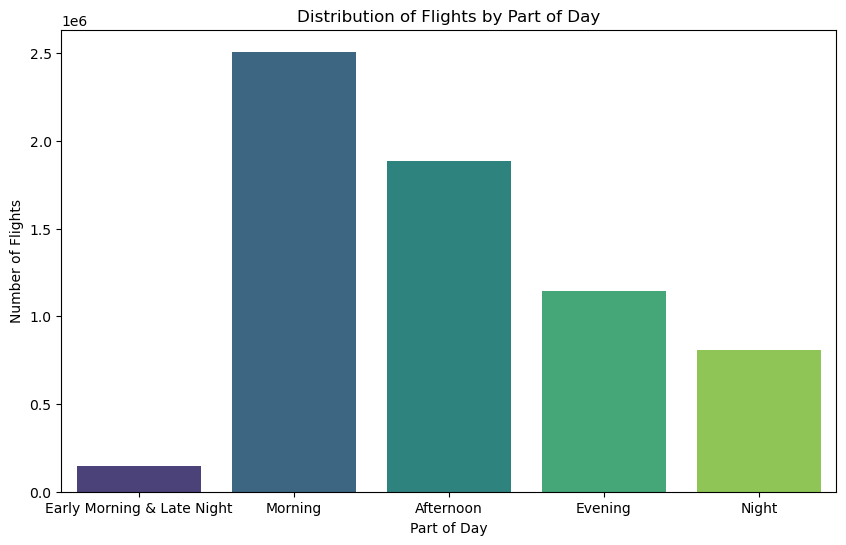

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the time block labels for different parts of the day
time_blocks_order = [
    'Early Morning & Late Night',  # 0001-0559
    'Morning',                     # 0600-1159
    'Afternoon',                   # 1200-1659
    'Evening',                     # 1700-1959
    'Night'                        # 2000-2359
]

# Assuming your DataFrame is named 'df' (or use your dataset variable, e.g., data_clean)
df = df.copy()

# Create a new column 'PART_OF_DAY' based on the starting time in DEP_TIME_BLK.
# It splits the string, converts the hour part to integer, and bins it into time ranges.
df['PART_OF_DAY'] = pd.cut(
    df['DEP_TIME_BLK'].map(lambda x: int(x.split('-')[0])),
    bins=[0, 600, 1200, 1700, 2000, 2400],
    labels=time_blocks_order,
    right=False
)

# Display the first few rows of DEP_TIME_BLK and PART_OF_DAY for verification
print(df[["DEP_TIME_BLK", "PART_OF_DAY"]].head())

# Plot the distribution of flights by part of day using seaborn's countplot
plt.figure(figsize=(10, 6))
sns.countplot(x = df['PART_OF_DAY'], palette="viridis")
plt.xlabel("Part of Day")
plt.ylabel("Number of Flights")
plt.title("Distribution of Flights by Part of Day")
plt.show()


                  PART_OF_DAY  DEP_DEL15
0  Early Morning & Late Night   0.079075
1                     Morning   0.119205
2                   Afternoon   0.212379
3                     Evening   0.268500
4                       Night   0.260179


/var/folders/wt/tg6zmlg51zgby6_gsdtq6tpw0000gn/T/ipykernel_85680/2086886887.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delay_rate = df.groupby("PART_OF_DAY")["DEP_DEL15"].mean().reset_index()
/var/folders/wt/tg6zmlg51zgby6_gsdtq6tpw0000gn/T/ipykernel_85680/2086886887.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="PART_OF_DAY", y="DEP_DEL15", data=delay_rate, palette="magma")


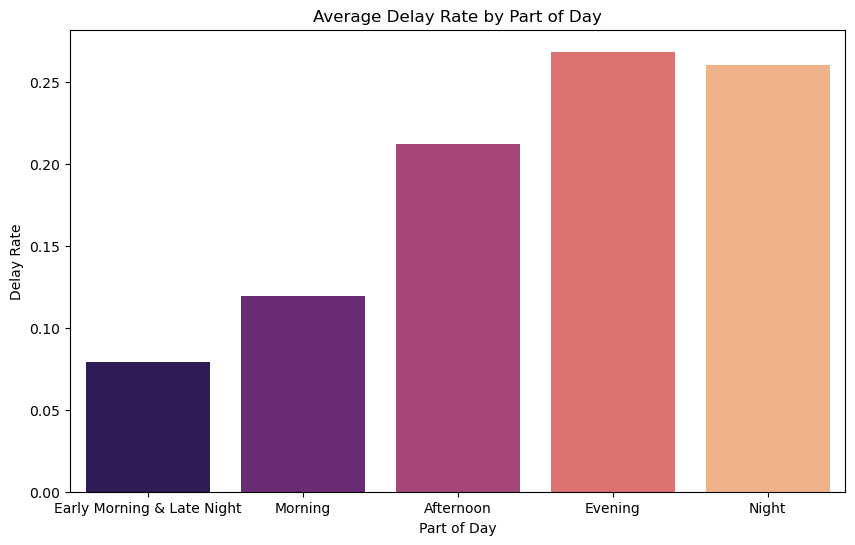

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame that includes the columns:
# 'DEP_TIME_BLK', 'PART_OF_DAY', and 'DEP_DEL15'
# and DEP_DEL15 is binary (0 = Not Delayed, 1 = Delayed)

# Group by PART_OF_DAY and calculate the delay rate (mean of DEP_DEL15)
delay_rate = df.groupby("PART_OF_DAY")["DEP_DEL15"].mean().reset_index()

# Print the delay rate per time block
print(delay_rate)

# Create a bar plot to visualize the delay rate by part of day
plt.figure(figsize=(10, 6))
sns.barplot(x="PART_OF_DAY", y="DEP_DEL15", data=delay_rate, palette="magma")
plt.xlabel("Part of Day")
plt.ylabel("Delay Rate")
plt.title("Average Delay Rate by Part of Day")
plt.show()


/var/folders/wt/tg6zmlg51zgby6_gsdtq6tpw0000gn/T/ipykernel_41790/1458271699.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_carrier.values, y=top_carrier.index, palette='viridis')


Text(0, 0.5, 'Carrier')

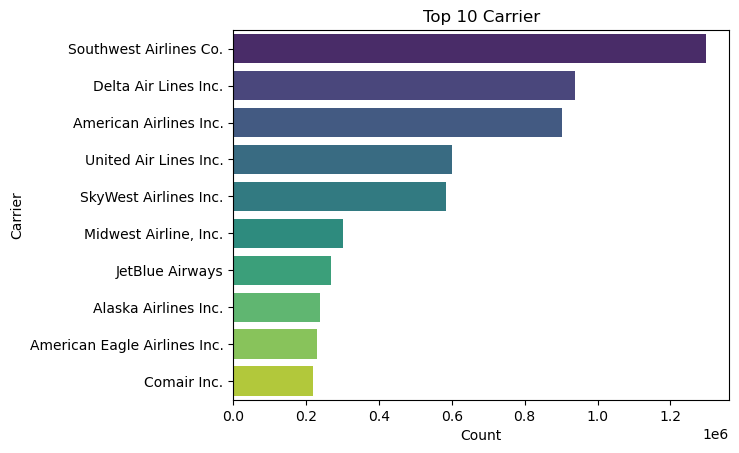

In [69]:
# Count the occurrences of each origin and destination
top_carrier = df['CARRIER_NAME'].value_counts().head(10)
#top_destinations = df['Dest'].value_counts().head(10)

# Plot the top 10 origins
sns.barplot(x=top_carrier.values, y=top_carrier.index, palette='viridis')
plt.title('Top 10 Carrier')
plt.xlabel('Count')
plt.ylabel('Carrier')

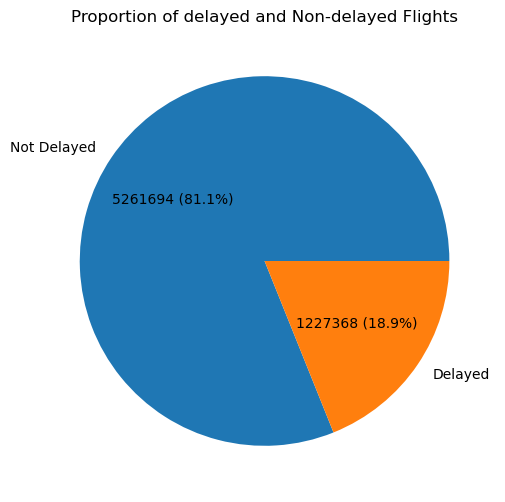

In [6]:
delayed_counts = df['DEP_DEL15'].value_counts()

# Labels for the pie chart
labels = ['Not Delayed', 'Delayed']

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(delayed_counts, labels=labels, autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * sum(delayed_counts) / 100, p))
plt.title('Proportion of delayed and Non-delayed Flights')
plt.show()

In [71]:
df.columns

Index(['MONTH', 'DAY_OF_WEEK', 'DEP_DEL15', 'DEP_TIME_BLK', 'DISTANCE_GROUP',
       'SEGMENT_NUMBER', 'CONCURRENT_FLIGHTS', 'NUMBER_OF_SEATS',
       'CARRIER_NAME', 'AIRPORT_FLIGHTS_MONTH', 'AIRLINE_FLIGHTS_MONTH',
       'AIRLINE_AIRPORT_FLIGHTS_MONTH', 'AVG_MONTHLY_PASS_AIRPORT',
       'AVG_MONTHLY_PASS_AIRLINE', 'FLT_ATTENDANTS_PER_PASS',
       'GROUND_SERV_PER_PASS', 'PLANE_AGE', 'DEPARTING_AIRPORT', 'LATITUDE',
       'LONGITUDE', 'PREVIOUS_AIRPORT', 'PRCP', 'SNOW', 'SNWD', 'TMAX',
       'AWND'],
      dtype='object')

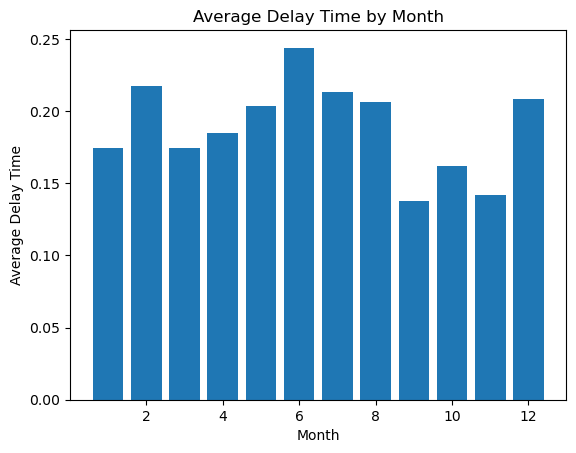

In [72]:
delay_month = df.groupby("MONTH")["DEP_DEL15"].mean().reset_index()
plt.bar(delay_month["MONTH"], delay_month["DEP_DEL15"])
plt.xlabel("Month")
plt.ylabel("Average Delay Time")
plt.title("Average Delay Time by Month");

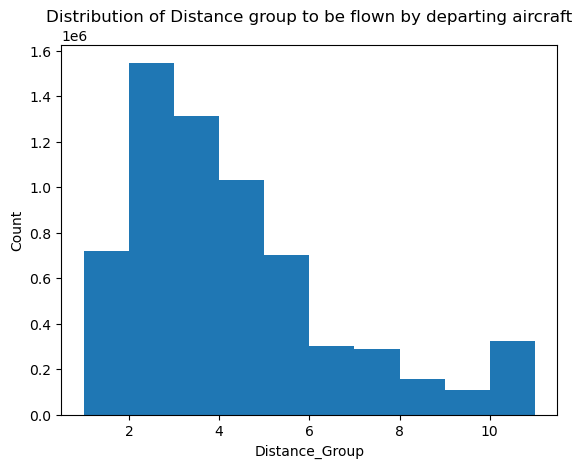

In [73]:
# Categories of flight distances based on how far an aircraft is expected to travel.
plt.hist(df["DISTANCE_GROUP"])
plt.xlabel("Distance_Group")
plt.ylabel("Count")
plt.title("Distribution of Distance group to be flown by departing aircraft");

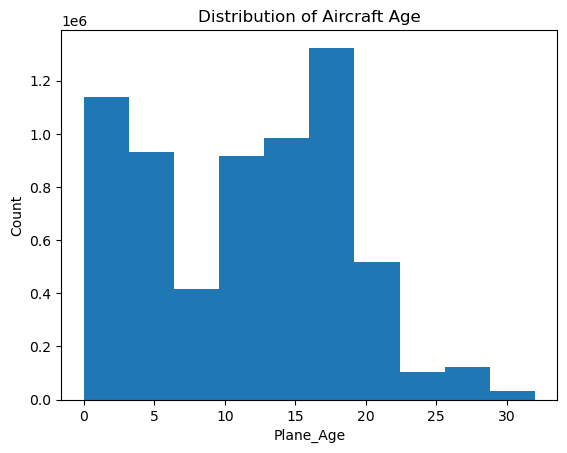

In [74]:
# Aircraft age analysis 
plt.hist(df["PLANE_AGE"])
plt.xlabel("Plane_Age")
plt.ylabel("Count")
plt.title("Distribution of Aircraft Age");

In [75]:
df.describe()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,...,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,LATITUDE,LONGITUDE,PRCP,SNOW,SNWD,TMAX,AWND
count,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,...,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06
mean,6.607062e+00,3.935598e+00,1.891441e-01,3.821102e+00,3.046890e+00,2.783675e+01,1.337397e+02,1.268458e+04,6.296058e+04,3.459251e+03,...,9.753707e-05,1.355612e-04,1.153211e+01,3.670581e+01,-9.425515e+01,1.037063e-01,3.159310e-02,9.152397e-02,7.146846e+01,8.341329e+00
std,3.396853e+00,1.995200e+00,3.916231e-01,2.382233e+00,1.757864e+00,2.151060e+01,4.645213e+01,8.839796e+03,3.438223e+04,4.251139e+03,...,8.644459e-05,4.649970e-05,6.935706e+00,5.500804e+00,1.790952e+01,3.432134e-01,3.170163e-01,7.281285e-01,1.835333e+01,3.607604e+00
min,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.400000e+01,1.100000e+03,5.582000e+03,1.000000e+00,...,0.000000e+00,7.134695e-06,0.000000e+00,1.844000e+01,-1.593460e+02,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+01,0.000000e+00
25%,4.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,1.100000e+01,9.000000e+01,5.345000e+03,2.503400e+04,6.540000e+02,...,3.419267e-05,9.889412e-05,5.000000e+00,3.343600e+01,-1.063770e+02,0.000000e+00,0.000000e+00,0.000000e+00,5.900000e+01,5.820000e+00
50%,7.000000e+00,4.000000e+00,0.000000e+00,3.000000e+00,3.000000e+00,2.300000e+01,1.430000e+02,1.156200e+04,7.087800e+04,2.251000e+03,...,6.178236e-05,1.246511e-04,1.200000e+01,3.750500e+01,-8.790600e+01,0.000000e+00,0.000000e+00,0.000000e+00,7.400000e+01,7.830000e+00
75%,1.000000e+01,6.000000e+00,0.000000e+00,5.000000e+00,4.000000e+00,3.900000e+01,1.720000e+02,1.761500e+04,8.631200e+04,4.806000e+03,...,1.441659e-04,1.772872e-04,1.700000e+01,4.077900e+01,-8.093600e+01,2.000000e-02,0.000000e+00,0.000000e+00,8.600000e+01,1.029000e+01
max,1.200000e+01,7.000000e+00,1.000000e+00,1.100000e+01,1.500000e+01,1.090000e+02,3.370000e+02,3.525600e+04,1.177280e+05,2.183700e+04,...,3.484077e-04,2.289855e-04,3.200000e+01,6.116900e+01,-6.600200e+01,1.163000e+01,1.720000e+01,2.520000e+01,1.150000e+02,3.378000e+01


In [76]:
def flight_status(row):
    if row['DEP_DEL15'] == 1:   #Check if the flight is delayed
        return 'Delayed'
    else:
        return 'Not Delayed'

# Apply the function to create the new column 'Flight_Status'
df['Flight_Status'] = df.apply(flight_status, axis=1)

# Verify the new column
print(df['Flight_Status'].value_counts())

Flight_Status
Not Delayed    5261694
Delayed        1227368
Name: count, dtype: int64


In [77]:
df.columns

Index(['MONTH', 'DAY_OF_WEEK', 'DEP_DEL15', 'DEP_TIME_BLK', 'DISTANCE_GROUP',
       'SEGMENT_NUMBER', 'CONCURRENT_FLIGHTS', 'NUMBER_OF_SEATS',
       'CARRIER_NAME', 'AIRPORT_FLIGHTS_MONTH', 'AIRLINE_FLIGHTS_MONTH',
       'AIRLINE_AIRPORT_FLIGHTS_MONTH', 'AVG_MONTHLY_PASS_AIRPORT',
       'AVG_MONTHLY_PASS_AIRLINE', 'FLT_ATTENDANTS_PER_PASS',
       'GROUND_SERV_PER_PASS', 'PLANE_AGE', 'DEPARTING_AIRPORT', 'LATITUDE',
       'LONGITUDE', 'PREVIOUS_AIRPORT', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'AWND',
       'Flight_Status'],
      dtype='object')

/var/folders/wt/tg6zmlg51zgby6_gsdtq6tpw0000gn/T/ipykernel_41790/3985438483.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DEP_DEL15', y='PREVIOUS_AIRPORT', data=airport_delays.head(10), palette='Reds_r')


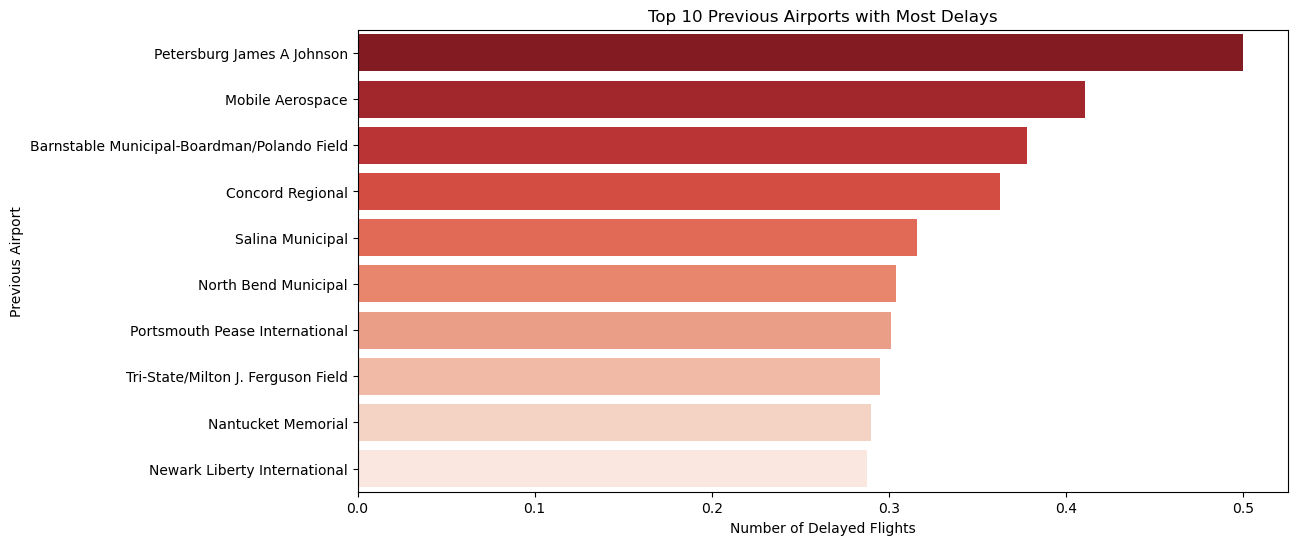

In [78]:
#  Airports that are having the highest departure delays(On an Average)
airport_delays = df.groupby('PREVIOUS_AIRPORT')['DEP_DEL15'].mean().reset_index()
airport_delays = airport_delays.sort_values(by='DEP_DEL15', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='DEP_DEL15', y='PREVIOUS_AIRPORT', data=airport_delays.head(10), palette='Reds_r')
plt.xlabel('Number of Delayed Flights')
plt.ylabel('Previous Airport')
plt.title('Top 10 Previous Airports with Most Delays')
plt.show()

/var/folders/wt/tg6zmlg51zgby6_gsdtq6tpw0000gn/T/ipykernel_85680/852325614.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_delay = df.groupby('plane_age_bin')['DEP_DEL15'].mean().reset_index()
/var/folders/wt/tg6zmlg51zgby6_gsdtq6tpw0000gn/T/ipykernel_85680/852325614.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='plane_age_bin', y='DEP_DEL15', data=age_delay, palette='magma')


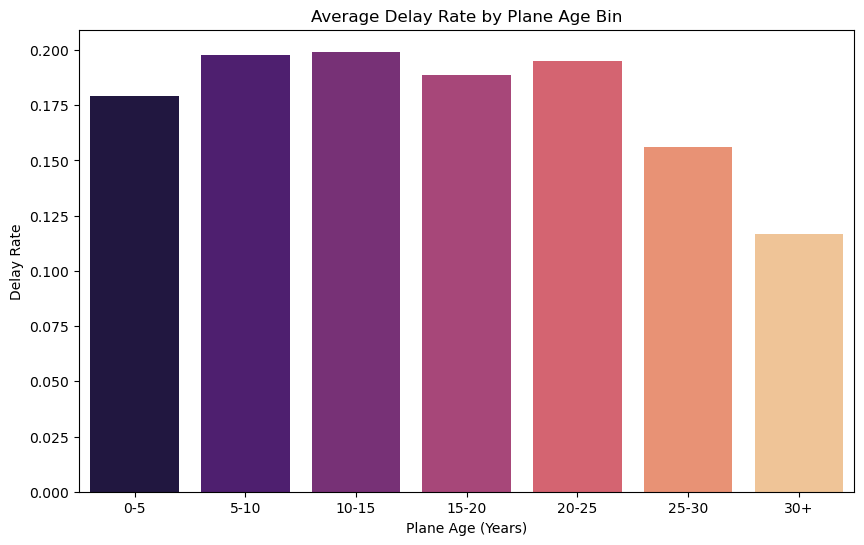

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create bins for PLANE_AGE (adjust bin edges as needed)
df['plane_age_bin'] = pd.cut(
    df['PLANE_AGE'],
    bins=[0, 5, 10, 15, 20, 25, 30, 100],  # 100 as an upper bound
    labels=['0-5','5-10','10-15','15-20','20-25','25-30','30+']
)

# 2. Calculate the average delay rate for each age bin
age_delay = df.groupby('plane_age_bin')['DEP_DEL15'].mean().reset_index()

# 3. Plot the delay rate by plane age bin
plt.figure(figsize=(10, 6))
sns.barplot(x='plane_age_bin', y='DEP_DEL15', data=age_delay, palette='magma')
plt.xlabel("Plane Age (Years)")
plt.ylabel("Delay Rate")
plt.title("Average Delay Rate by Plane Age Bin")
plt.show()


In [79]:
df.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND,Flight_Status
0,1,7,0,0800-0859,2,1,25,143,Southwest Airlines Co.,13056,...,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91,Not Delayed
1,1,7,0,0700-0759,7,1,29,191,Delta Air Lines Inc.,13056,...,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91,Not Delayed
2,1,7,0,0600-0659,7,1,27,199,Delta Air Lines Inc.,13056,...,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91,Not Delayed
3,1,7,0,0600-0659,9,1,27,180,Delta Air Lines Inc.,13056,...,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91,Not Delayed
4,1,7,0,0001-0559,7,1,10,182,Spirit Air Lines,13056,...,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91,Not Delayed


In [81]:
df[df['PREVIOUS_AIRPORT'] == 'Petersburg James A Johnson']

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND,Flight_Status
493179,1,2,1,1500-1559,2,5,6,120,Alaska Airlines Inc.,1304,...,Anchorage International,61.169,-149.985,Petersburg James A Johnson,0.0,0.0,11.0,31.0,5.59,Delayed
5932481,11,5,0,2200-2259,3,5,2,120,Alaska Airlines Inc.,1267,...,Anchorage International,61.169,-149.985,Petersburg James A Johnson,0.0,0.0,0.0,48.0,4.70,Not Delayed


In [82]:
df_filtered = df[df['PREVIOUS_AIRPORT'] == 'Petersburg James A Johnson']
print(df_filtered['PREVIOUS_AIRPORT'])

493179     Petersburg James A Johnson
5932481    Petersburg James A Johnson
Name: PREVIOUS_AIRPORT, dtype: object


In [52]:
df_filtered.shape

(0, 27)

In [53]:
df_filtered['PREVIOUS_AIRPORT'].unique()

array([], dtype=object)

/var/folders/wt/tg6zmlg51zgby6_gsdtq6tpw0000gn/T/ipykernel_41790/1897618244.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Flight_Status', y=var, data=avg_delayed, ax=axes[i], palette={'Delayed': '#FFBF00', 'Not Delayed': '#007000'})
/var/folders/wt/tg6zmlg51zgby6_gsdtq6tpw0000gn/T/ipykernel_41790/1897618244.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Flight_Status', y=var, data=avg_delayed, ax=axes[i], palette={'Delayed': '#FFBF00', 'Not Delayed': '#007000'})
/var/folders/wt/tg6zmlg51zgby6_gsdtq6tpw0000gn/T/ipykernel_41790/1897618244.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to 

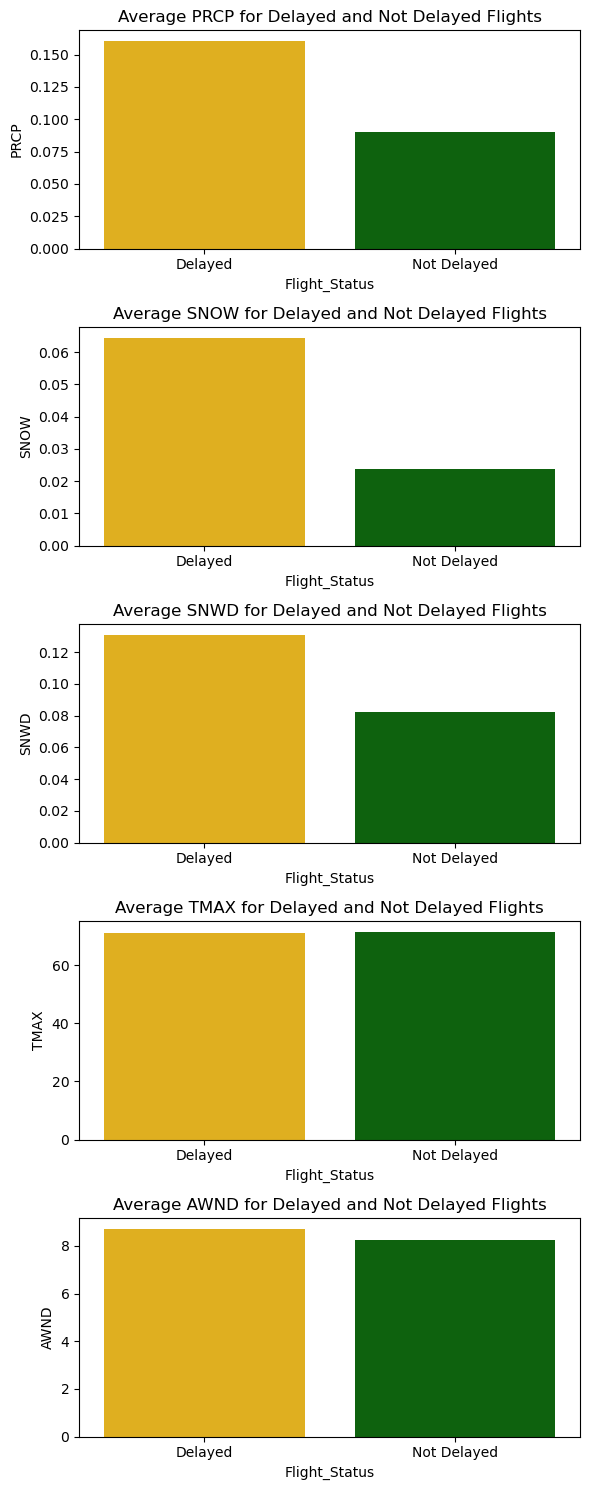

In [37]:
# Variables to analyze (Weather)
variables = ['PRCP', 'SNOW', 'SNWD', 'TMAX', 'AWND']
fig, axes = plt.subplots(nrows=len(variables), ncols=1, figsize=(6, 15))

for i, var in enumerate(variables):
    avg_delayed = df.groupby('Flight_Status')[var].mean().reset_index()
    sns.barplot(x='Flight_Status', y=var, data=avg_delayed, ax=axes[i], palette={'Delayed': '#FFBF00', 'Not Delayed': '#007000'})
    axes[i].set_title(f'Average {var} for Delayed and Not Delayed Flights')

plt.tight_layout()
plt.show()


# PRCP:				Inches of precipitation for day
# SNOW:				Inches of snowfall for day
# SNWD:				Inches of snow on ground for day
# TMAX:				Max temperature for day
# AWND:				Max wind speed for day

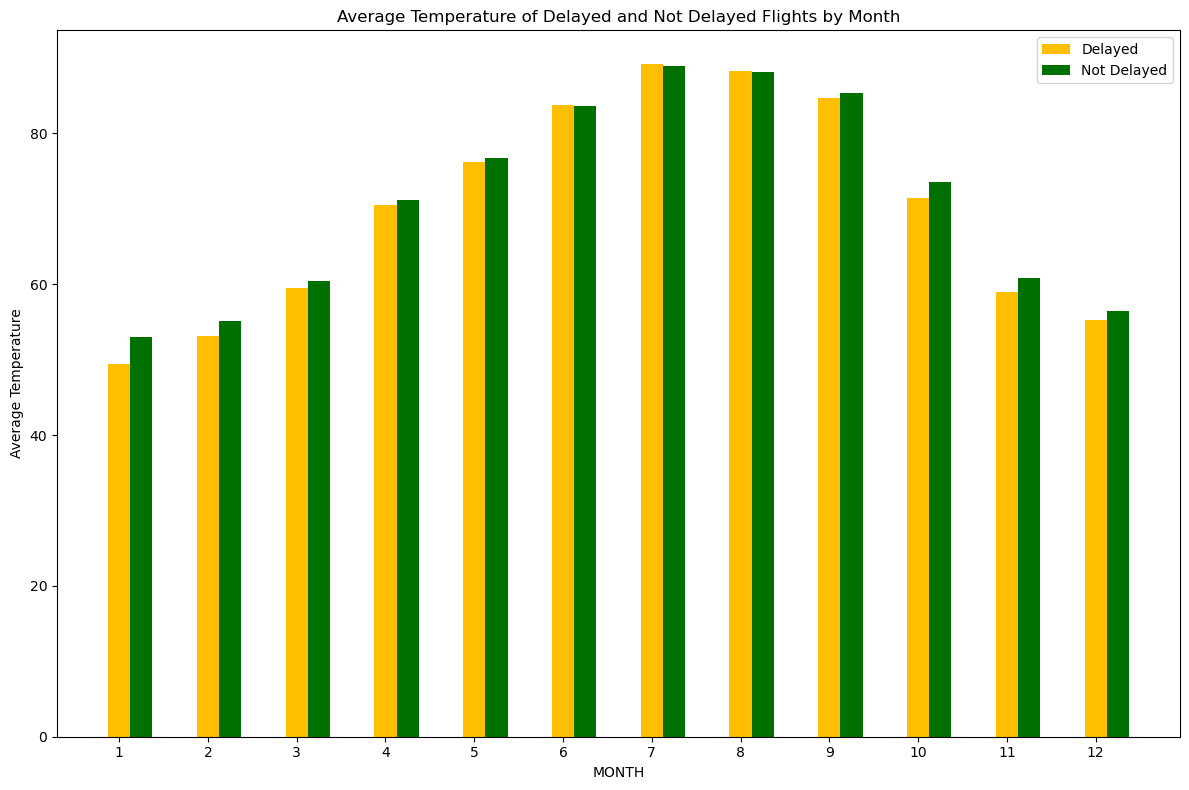

In [38]:
# Calculate average temperature for delayed and not delayed flights for each month
monthly_avg_temp_delayed = df[df['Flight_Status'] == 'Delayed'].groupby('MONTH')['TMAX'].mean()
monthly_avg_temp_not_delayed = df[df['Flight_Status'] == 'Not Delayed'].groupby('MONTH')['TMAX'].mean()

# Set up the plot
plt.figure(figsize=(12, 8))

# Get the number of months
num_months = len(monthly_avg_temp_delayed.index)

# Set the width of each bar
bar_width = 0.25

# Set the positions for the bars
positions = range(1, num_months + 1)

delayed_color = '#FFBF00'
not_delayed_color = '#007000'


# Plot bars for average temperature of cancelled flights
plt.bar([p + bar_width for p in positions], monthly_avg_temp_delayed, width=bar_width, color=delayed_color, align='center', label='Delayed')

# Plot bars for average temperature of not delayed flights
plt.bar([p + 2*bar_width for p in positions], monthly_avg_temp_not_delayed, width=bar_width, color=not_delayed_color, align='center', label='Not Delayed')

# Add labels, title, and legend
plt.xlabel('MONTH')
plt.ylabel('Average Temperature')
plt.title('Average Temperature of Delayed and Not Delayed Flights by Month')
plt.xticks([p + bar_width for p in positions], monthly_avg_temp_delayed.index)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

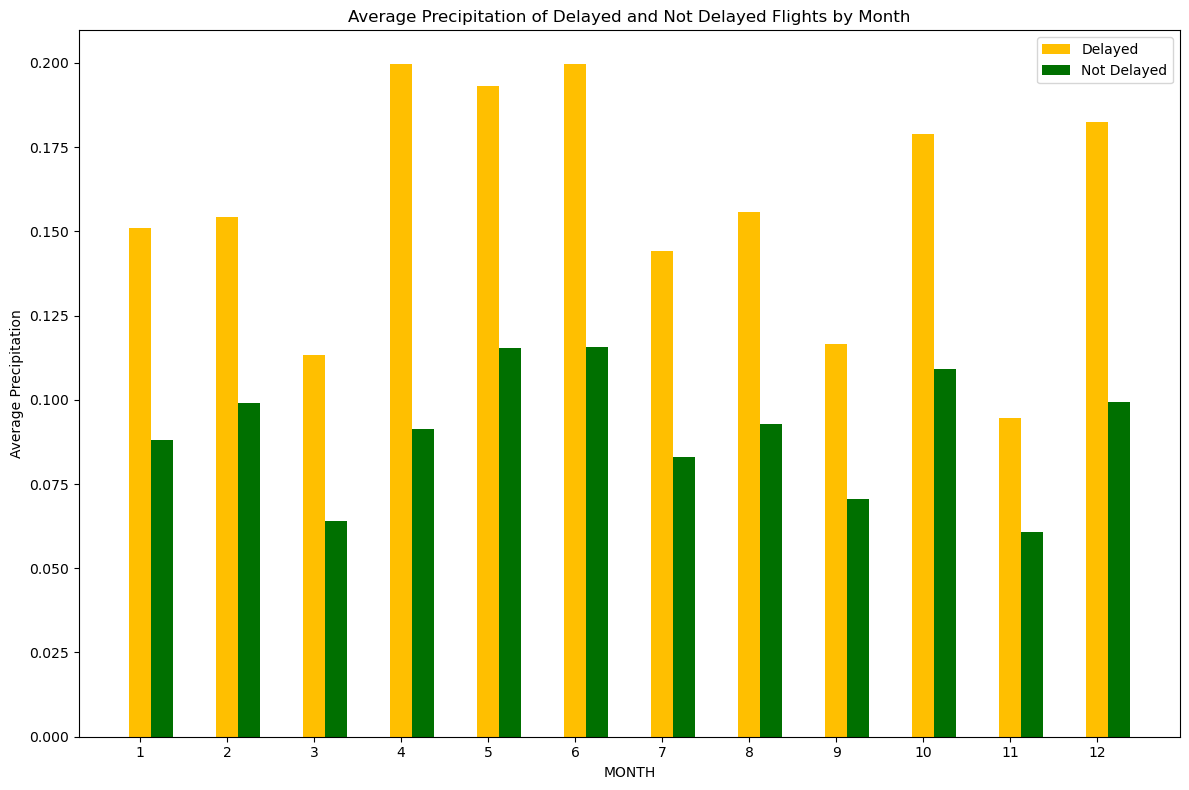

In [39]:
# Calculate average temperature for delayed and not delayed flights for each month
monthly_avg_precip_delayed = df[df['Flight_Status'] == 'Delayed'].groupby('MONTH')['PRCP'].mean()
monthly_avg_precip_not_delayed = df[df['Flight_Status'] == 'Not Delayed'].groupby('MONTH')['PRCP'].mean()

# Set up the plot
plt.figure(figsize=(12, 8))

# Get the number of months
num_months = len(monthly_avg_precip_delayed.index)

# Set the width of each bar
bar_width = 0.25

# Set the positions for the bars
positions = range(1, num_months + 1)

delayed_color = '#FFBF00'
not_delayed_color = '#007000'


# Plot bars for average temperature of cancelled flights
plt.bar([p + bar_width for p in positions], monthly_avg_precip_delayed, width=bar_width, color=delayed_color, align='center', label='Delayed')

# Plot bars for average temperature of not delayed flights
plt.bar([p + 2*bar_width for p in positions], monthly_avg_precip_not_delayed, width=bar_width, color=not_delayed_color, align='center', label='Not Delayed')

# Add labels, title, and legend
plt.xlabel('MONTH')
plt.ylabel('Average Precipitation')
plt.title('Average Precipitation of Delayed and Not Delayed Flights by Month')
plt.xticks([p + bar_width for p in positions], monthly_avg_precip_delayed.index)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

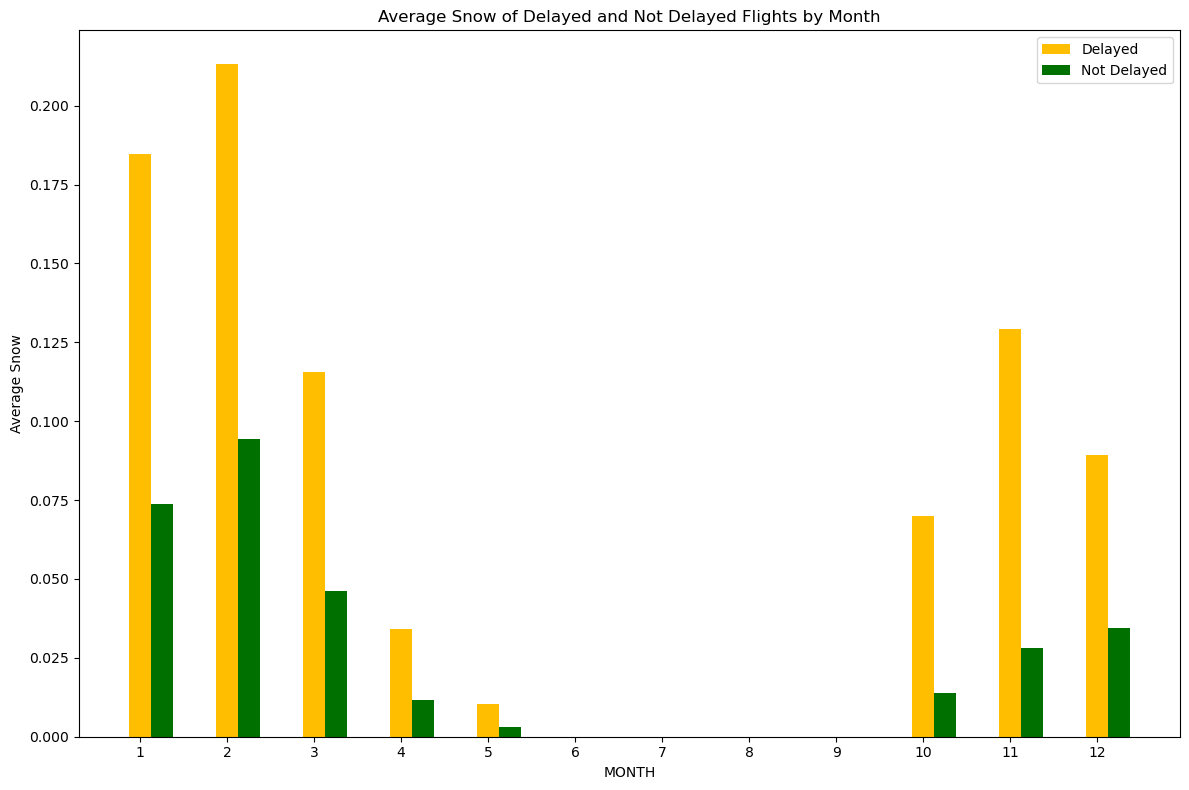

In [40]:
# Calculate average temperature for delayed, cancelled, and not delayed flights for each month
monthly_avg_snow_delayed = df[df['Flight_Status'] == 'Delayed'].groupby('MONTH')['SNOW'].mean()
monthly_avg_snow_not_delayed = df[df['Flight_Status'] == 'Not Delayed'].groupby('MONTH')['SNOW'].mean()

# Set up the plot
plt.figure(figsize=(12, 8))

# Get the number of months
num_months = len(monthly_avg_snow_delayed.index)

# Set the width of each bar
bar_width = 0.25

# Set the positions for the bars
positions = range(1, num_months + 1)

delayed_color = '#FFBF00'
not_delayed_color = '#007000'


# Plot bars for average temperature of cancelled flights
plt.bar([p + bar_width for p in positions], monthly_avg_snow_delayed, width=bar_width, color=delayed_color, align='center', label='Delayed')

# Plot bars for average temperature of not delayed flights
plt.bar([p + 2*bar_width for p in positions], monthly_avg_snow_not_delayed, width=bar_width, color=not_delayed_color, align='center', label='Not Delayed')

# Add labels, title, and legend
plt.xlabel('MONTH')
plt.ylabel('Average Snow')
plt.title('Average Snow of Delayed and Not Delayed Flights by Month')
plt.xticks([p + bar_width for p in positions], monthly_avg_snow_delayed.index)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

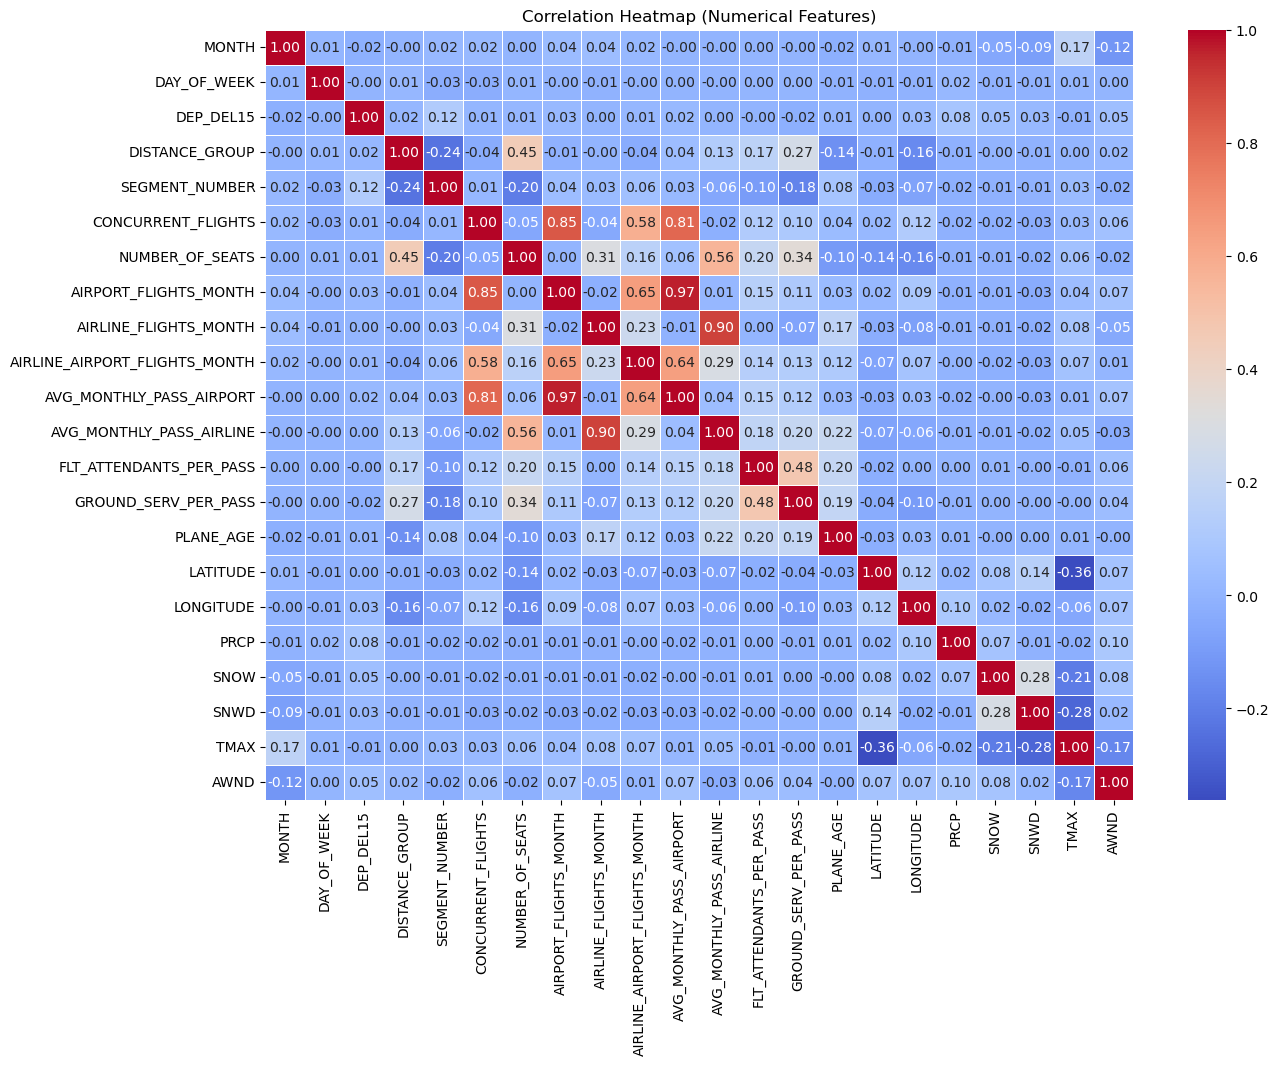

In [44]:
# Correlation 

# only numerical columns (float and int types)
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()
